In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier


In [3]:
df=pd.read_csv("data/loan.csv")
data = df.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print(f'shape of dataset: {df.shape}')
print(f'types of dataset columns : {df.dtypes}')


shape of dataset: (614, 13)
types of dataset columns : Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [6]:

df.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.0,1897.55,2216.1,2877.5,3812.5,5795.00,9459.9,14583.0,32540.41,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,0.00,0.0,0.0,1188.5,2297.25,3782.2,4997.4,8895.89,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,30.0,56.00,71.0,100.0,128.0,168.00,235.8,297.8,496.36,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,84.0,180.00,294.0,360.0,360.0,360.00,360.0,360.0,480.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,0.0,0.00,0.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0


Univariate analysis of Categorical Data

In [7]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

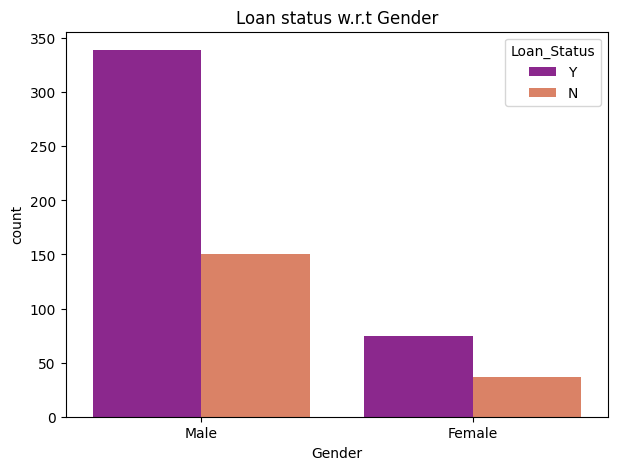

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(x= 'Gender',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Gender")
plt.show()

# So male are more whose laon_status  is yes

In [9]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

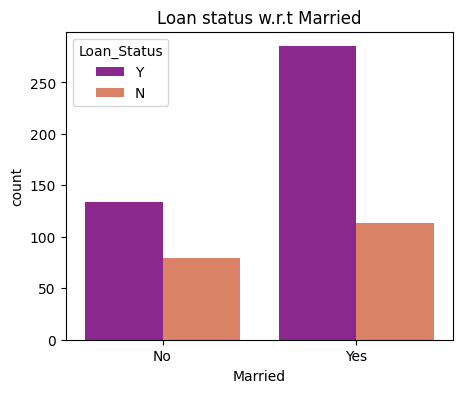

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Married',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Married")
plt.show()


# married are taking more loan

In [11]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

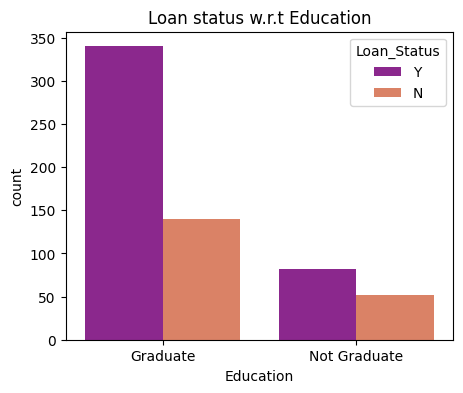

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Education',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Education")
plt.show()

In [13]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

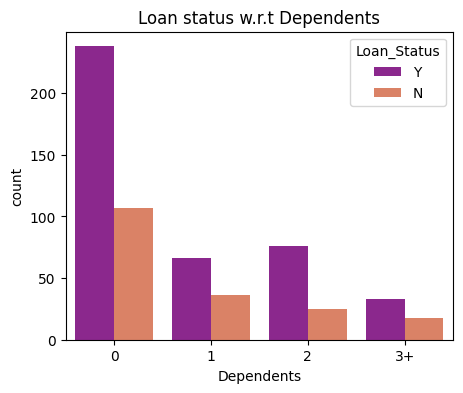

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Dependents',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Dependents")
plt.show()

In [15]:

data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

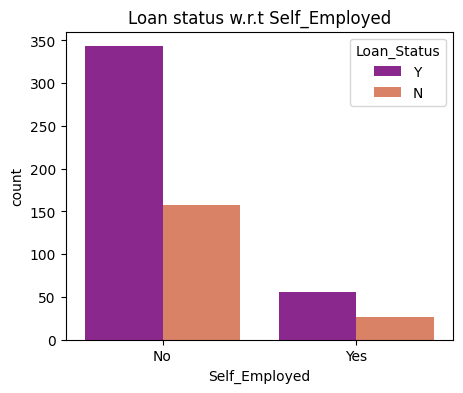

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Self_Employed',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Self_Employed")
plt.show()

In [17]:

data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

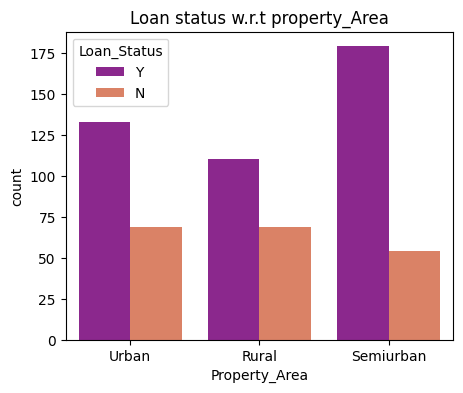

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Property_Area',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t property_Area")
plt.show()

In [20]:

data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

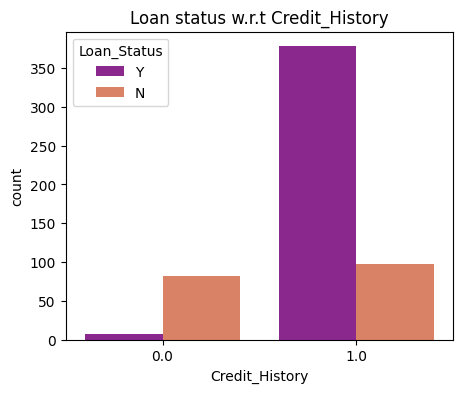

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x= 'Credit_History',hue = 'Loan_Status',data=data, palette='plasma' )
plt.title("Loan status w.r.t Credit_History")
plt.show()

Missing value Imputation

In [22]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:

data['Gender'].fillna('Male',inplace=True)

In [24]:
data['Married'].fillna('Yes',inplace=True)

In [25]:
data['Dependents'].fillna('0',inplace=True)

In [26]:
data['Education'].fillna('Graduate',inplace=True)

In [27]:
data['Self_Employed'].fillna('No',inplace=True)

In [28]:
data['ApplicantIncome'].fillna(data['ApplicantIncome'].mean(),inplace=True)

In [29]:

data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].mean(),inplace=True)

In [30]:

data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [31]:

data['Loan_Amount_Term'].fillna(360,inplace=True)

In [32]:
data['Credit_History'].fillna(1.0,inplace=True)

In [33]:

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Bivariate of categorical feature

In [34]:

data.groupby(['Loan_Status','Gender'])['Loan_ID'].count().reset_index() 

,Loan_Status,Gender,Loan_ID
0,N,Female,37
1,N,Male,155
2,Y,Female,75
3,Y,Male,347


In [35]:
data.groupby(['Loan_Status','Married'])['Loan_ID'].count().reset_index()

,Loan_Status,Married,Loan_ID
0,N,No,79
1,N,Yes,113
2,Y,No,134
3,Y,Yes,288


In [36]:
data.groupby(['Loan_Status','Dependents'])['Loan_ID'].count().reset_index()

,Loan_Status,Dependents,Loan_ID
0,N,0,113
1,N,1,36
2,N,2,25
3,N,3+,18
4,Y,0,247
5,Y,1,66
6,Y,2,76
7,Y,3+,33


In [37]:
data.groupby(['Loan_Status','Education'])['Loan_ID'].count().reset_index()

,Loan_Status,Education,Loan_ID
0,N,Graduate,140
1,N,Not Graduate,52
2,Y,Graduate,340
3,Y,Not Graduate,82


In [38]:

data.groupby(['Loan_Status','Self_Employed'])['Loan_ID'].count().reset_index()

,Loan_Status,Self_Employed,Loan_ID
0,N,No,166
1,N,Yes,26
2,Y,No,366
3,Y,Yes,56


In [40]:

data.groupby(['Loan_Status','Property_Area'])['Loan_ID'].count().reset_index()

,Loan_Status,Property_Area,Loan_ID
0,N,Rural,69
1,N,Semiurban,54
2,N,Urban,69
3,Y,Rural,110
4,Y,Semiurban,179
5,Y,Urban,133


Outlier using box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddaeabeca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddaeac9220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddaeabea00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddaeac9760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddaeac9a00>],
 'means': []}

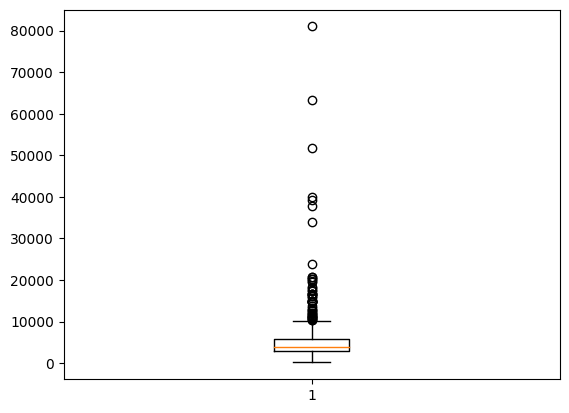

In [42]:
plt.boxplot(data['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddaea2ac40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddaea361c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddaea2a9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddaea36700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddaea369a0>],
 'means': []}

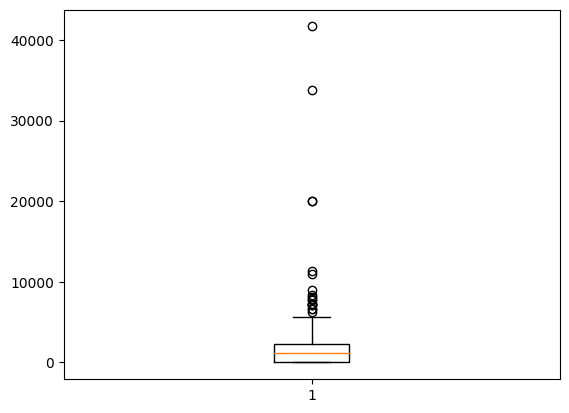

In [43]:
plt.boxplot(data['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddaea09bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddae999130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddaea09910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddae999670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddae999910>],
 'means': []}

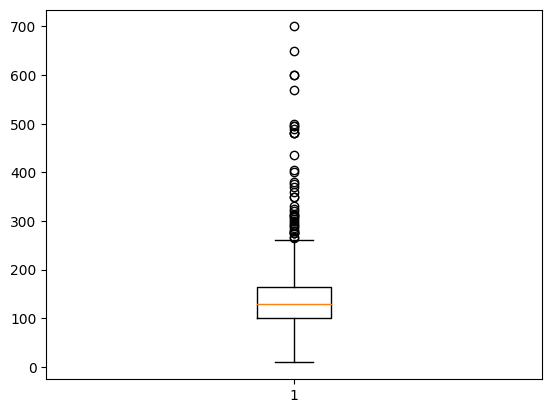

In [44]:

plt.boxplot(data['LoanAmount'])

In [45]:

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [56]:
## correlation
df.select_dtypes(exclude=[object]).corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<Axes: >

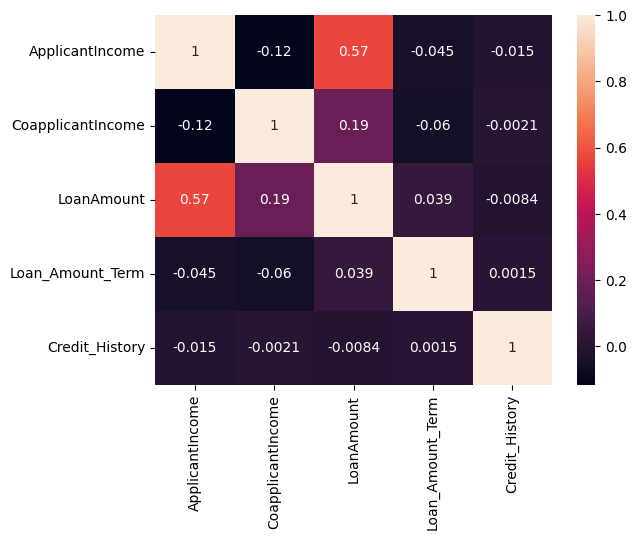

In [60]:

sns.heatmap(corr,annot=True)

In [63]:
'''plt.figure(figsize=(5,5))
sns.heatmap(corr,vmax=0.5,linewidth=0.1,cmap='coolwarm')
plt.show()'''

"plt.figure(figsize=(5,5))\nsns.heatmap(corr,vmax=0.5,linewidth=0.1,cmap='coolwarm')\nplt.show()"

In [64]:
data1 = data[data['Loan_Status']=='Y']
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


In [65]:
data2 = data[data['Loan_Status']=='N']
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.000000,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.000000,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.000000,360.0,1.0,Rural,N
597,LP002943,Male,No,0,Graduate,No,2987,0.0,88.000000,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.000000,180.0,1.0,Urban,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,146.412162,180.0,1.0,Urban,N


In [67]:
data_d=pd.get_dummies(data,columns=['Dependents','Property_Area'], drop_first=True)

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()

In [70]:
for i in data_d.columns:
    if (data_d[i].dtypes=='object') and (i !='Loan_ID'):
        data_d[i]=le.fit_transform(data_d[i])

In [71]:
data_d.drop('Loan_ID', axis = 1, inplace =True)

Logistic Regression

In [72]:
X = data_d.drop('Loan_Status' , axis = True)

y= data_d.Loan_Status

In [73]:
y= data_d.Loan_Status
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [74]:
lr=LogisticRegression()

In [75]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (429, 14)
X_test shape: (185, 14)
y_test shape: (185,)


In [76]:
lr.fit(X_train , y_train)

/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
#cross validation
kfold=KFold(n_splits=5,shuffle= True,random_state=10)

In [79]:
'''pred_train_kfold=cross_val_predict(lr,X_train,y_train,cv=kfold)'''

'pred_train_kfold=cross_val_predict(lr,X_train,y_train,cv=kfold)'

In [80]:
#prediction on train
pred_train=lr.predict(X_train)

In [81]:
pred_proba_train=lr.predict_proba(X_train)[:,1]

In [82]:
print(confusion_matrix(y_train,pred_train))
print(accuracy_score(y_train,pred_train))
print(recall_score(y_train,pred_train))
print(precision_score(y_train,pred_train))
print(f1_score(y_train,pred_train))

[[ 62  69]
 [  6 292]]
0.8251748251748252
0.9798657718120806
0.8088642659279779
0.8861911987860396


In [83]:
fpr,tpr,thr=roc_curve(y_train,pred_proba_train,drop_intermediate=False)

In [84]:
roc_auc_score(y_train,pred_proba_train)

0.7875915774373687

In [85]:
#prediction on test
pred_test=lr.predict(X_test)

In [86]:
pred_proba_test=lr.predict_proba(X_test)[:,1]

In [87]:
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(recall_score(y_test,pred_test))
print(precision_score(y_test,pred_test))
print(f1_score(y_test,pred_test))

[[ 22  39]
 [  6 118]]
0.7567567567567568
0.9516129032258065
0.7515923566878981
0.8398576512455517


In [88]:
fpr1,tpr1,thr1=roc_curve(y_test,pred_proba_test,drop_intermediate=False)

In [89]:
print(thr1)

[       inf 0.97818943 0.972937   0.95009691 0.94053369 0.9372226
 0.9369676  0.92321282 0.92185547 0.92158921 0.91952407 0.91657248
 0.9157672  0.91446341 0.91230012 0.91001242 0.90975803 0.90520715
 0.90492224 0.90367704 0.90183029 0.90131894 0.89970739 0.89955093
 0.8980208  0.89536591 0.89514889 0.89403128 0.89384717 0.89281178
 0.89159772 0.88672512 0.88264491 0.87992845 0.8760368  0.87453043
 0.87441504 0.87363536 0.87320401 0.87179959 0.8708141  0.86638039
 0.86568183 0.86561218 0.86197281 0.86013261 0.85841369 0.85791565
 0.85701112 0.84860339 0.84702057 0.84450058 0.8429423  0.83484689
 0.83414165 0.83329691 0.83279155 0.82848077 0.82681679 0.82028098
 0.81819018 0.81437452 0.80836833 0.80673075 0.79698047 0.79333737
 0.79240346 0.79105953 0.79044612 0.78343521 0.7832807  0.77801939
 0.77652818 0.77591005 0.77574549 0.7744975  0.77414312 0.77309004
 0.77298687 0.77274904 0.77155991 0.77071271 0.77019842 0.76943778
 0.76942046 0.76722577 0.76645574 0.76573241 0.76526197 0.76512

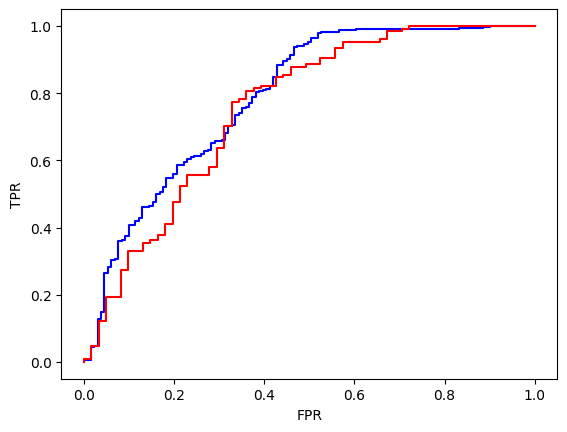

In [90]:
plt.plot(fpr,tpr,color='b')
plt.plot(fpr1,tpr1,color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [91]:
roc_auc_score(y_test,pred_proba_test)

0.755288207297726